In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Reading data
data = pd.read_csv('data/house_data.csv', index_col=0)
# X-->inputs Y-->outputs
X = np.array(data[['grade','bathrooms','lat','sqft_living','view']])
y = np.array(data['price'])
y = y.reshape(y.shape[0],1)
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [2]:
#hypothesis function vicorized
def h(theta,X):
    return np.dot(X,theta)
#Cost function
def computeCost(theta, X, y):
    m = y.size # number of training examples
    squareSum = np.dot ((h(theta,X)-y).T , (h(theta,X)-y) )
    J = float( (1/(2*m)) * squareSum ) 
    return J

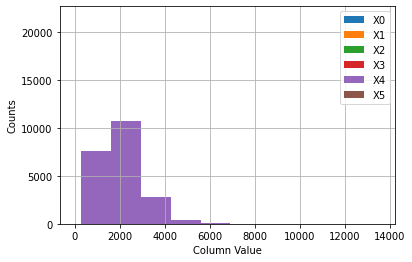

Clearly we need feature normalization.


In [3]:
def plotDummy(X):
    #Plotting data
    plt.grid(True)
    #plt.xlim([75000,7700000]) #to show how much area of houses data far from each value
    dummy = plt.hist(X[:,0],label = 'X0')
    dummy = plt.hist(X[:,1],label = 'X1')
    dummy = plt.hist(X[:,2],label = 'X2')
    dummy = plt.hist(X[:,3],label = 'X3')
    dummy = plt.hist(X[:,4],label = 'X4')
    dummy = plt.hist(X[:,5],label = 'X5')
    plt.xlabel('Column Value')
    plt.ylabel('Counts')
    dummy = plt.legend()
    plt.show()

plotDummy(X)
print('Clearly we need feature normalization.')

In [4]:
means, stds = [], []
def FeatureNormalize(X):
    #Feature normalizing --> (value-mean)/std
    XNormalized = X.copy()
    for i in range(XNormalized.shape[1]):
        means.append( np.mean(XNormalized[:,i]) )
        stds.append( np.std(XNormalized[:,i]) )
        #Skip the first column we don't need to normalize this
        if not i: continue
        XNormalized[:,i] = (XNormalized[:,i] - means[-1])/stds[-1]
    return XNormalized

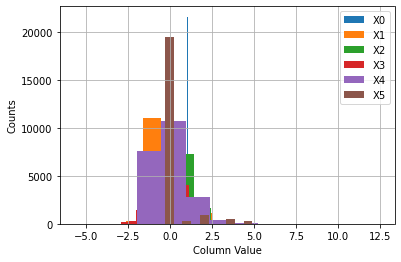

In [5]:
XNormalized = FeatureNormalize(X)
plotDummy(XNormalized)

In [34]:
#Gradiant Descent
iterations = 500
alpha = 0.01
def Gradiantdescent(X, initial_theta):
    m = y.size
    theta = initial_theta
    jvec = [] #all cost functions
    thetahistory = [] #theta history
    for _ in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))

        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m) * np.sum( (h(theta,X) - y)*np.array(X[:,j]).reshape(m,1) )
        tmptheta[0] =  theta[j] - (alpha/m) * np.sum( (h(theta,X) - y) )
        theta = tmptheta
    return theta, thetahistory, jvec

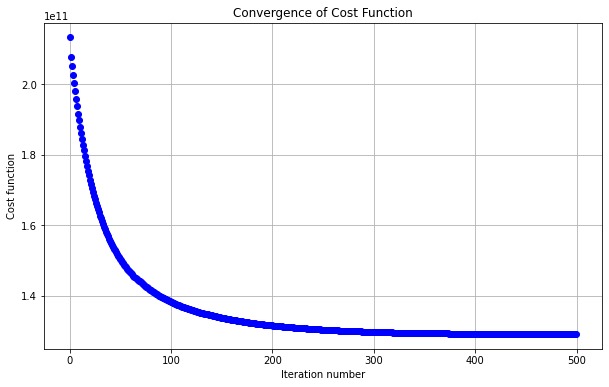

In [35]:
initial_theta = np.zeros((XNormalized.shape[1],1))
theta, thetahistory, jvec = Gradiantdescent(XNormalized,initial_theta)
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot( range(len(jvec)) ,jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])

plotConvergence(jvec)
plt.show()

In [36]:
def predict(test):
    ytestscaled = [ (test[x]-means[x+1])/stds[x+1]     for x in range( len(test) ) ]        #Apply feature normalization
    ytestscaled.insert(0,1)
    return ytestscaled

#checking on values
print("Final result theta parameters: \n",theta)
print("Check of result: What is price of house with (11 grades, 6.75 bathrooms, 47.46 lat, 7480 square living, 2 views ?")
print("$%0.2f" % float(h(theta, predict(test = np.array([11., 6.75, 47.46, 7480, 2])))))

Final result theta parameters: 
 [[ 82852.94373229]
 [102561.780659  ]
 [  7612.34769195]
 [ 92615.41506232]
 [140657.83351507]
 [ 78326.34304712]]
Check of result: What is price of house with (11 grades, 6.75 bathrooms, 47.46 lat, 7480 square living, 2 views ?
$1361010.64
